In [3]:
from __future__ import print_function,division
import pylab as pl

import pandas as pd
import numpy as np
import os
%pylab inline


import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata = os.environ["PUIDATA"] ="%S/puidata"%os.getenv("HOME")
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")

print(os.getenv("PUIDATA"))



Populating the interactive namespace from numpy and matplotlib
/nfshome/jl9200/PUIdata


# IDEA:
#### young women are likely than young men to choose biking in weekends



# NULL HYPOTHESIS:
The proportion of young women ( age under 35) biking on weekends is the same or higher than the proportion of young men (age under 35)biking on weekend

I will use a significance level  $\alpha=0.05$



In [4]:
def getCitiBikeCSV(datestring):
    print ("Loading:...",datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring +"-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):

            # move to the current dir
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print("Error moving file! Please check the file!")
        # then start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):

                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    print(1)
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                    print(2)
                ### moving item, I can use os.system()functions to run bash commands with arguments
                os.system('mv ' + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ## unzip the csv
            
            os.system("unzip " + os.getenv("PUIDATA") + '/' + datestring + "-citibike-tripdata.zip")
            print(3)

            ## if older than 2014  there will be a different name structure.

            if '2014' in datestring:
                print('wait!')
                os.system('mv '+  datestring[:4] + '-' + datestring[4:] + '\ -\ Citi\ Bike\ trip\ data.csv ' + 
                          os.getenv("PUIDATA"))
            os.system('mv ' + datestring + '-citibike-tripdata.csv '+os.getenv('PUIDATA'))
    ###
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + datestring + '-citibike-tripdata.csv'):
        print ("Ouch! the file is still not there!")
    else:
        print ("file is here, continue")

In [5]:
datestring = '201502'
getCitiBikeCSV(datestring)

Loading:... 201502
file is here, continue


In [6]:
# make a pandas database

df = pd.read_csv(os.getenv("PUIDATA")+'/'+datestring+'-citibike-tripdata.csv')

In [7]:

df['date'] = pd.to_datetime(df['starttime'])
# drop columns for a clean dataset
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'],axis = 1,inplace = True)

# display view rows
df.head(4)

,birth year,gender,date
0,1978.0,2,2015-02-01 00:00:00
1,1993.0,1,2015-02-01 00:00:00
2,1969.0,2,2015-02-01 00:01:00
3,1985.0,2,2015-02-01 00:01:00


In [8]:
# see how many rows in the dataframe
len(df.index)

196930

In [9]:
# age under 35
# which is born after 1983

df = df[df['birth year']>1982]
len(df.index)


65140

In [147]:
# now we have the dataset for the young people (age under 35)
df.head(4)

,birth year,gender,date
1,1993.0,1,2015-02-01 00:00:00
3,1985.0,2,2015-02-01 00:01:00
6,1983.0,1,2015-02-01 00:04:00
8,1985.0,2,2015-02-01 00:04:00


In [12]:
df['gender'].unique()

array([1, 2, 0])

In [11]:
# now we also see there are 38 people with the gender as 0 (unidentified)
len(df[df['gender']==0])

38

### then I need to seperate the gender into to test the hypotheses.  Gender ==1 is male, Gender ==2 is femail




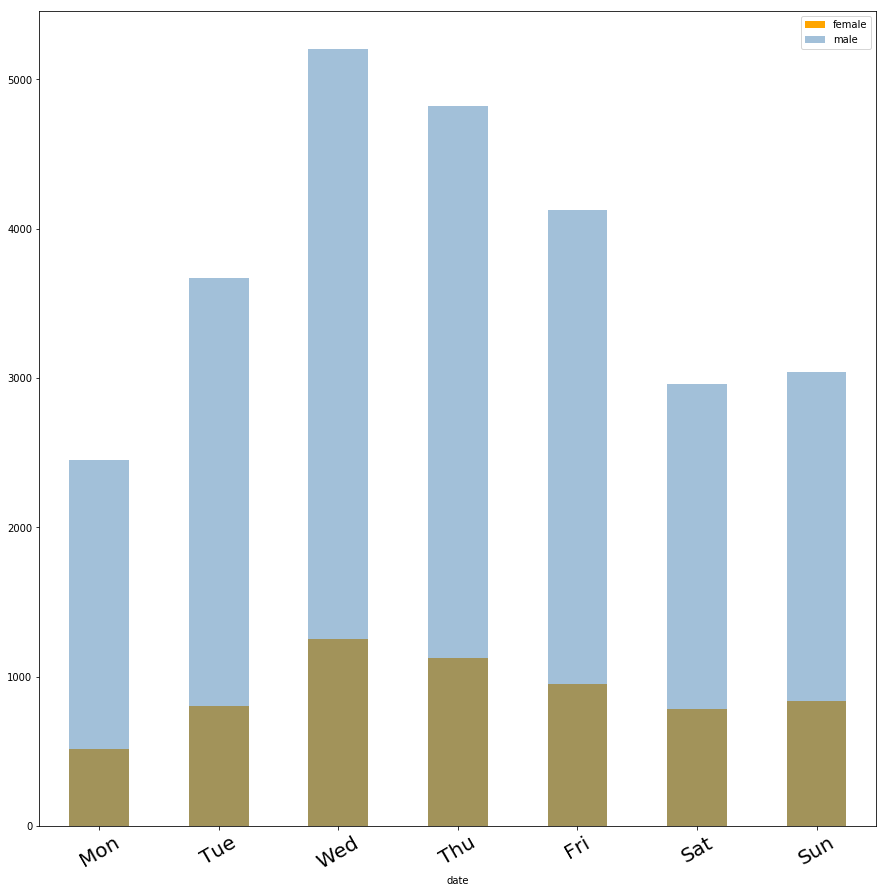

In [10]:
# plot  number of trips per weekend

fig = pl.figure(figsize = (15,15))
ax = fig.add_subplot(111)

# use .groupby 
data_w = 2
((df['date'][df['gender'] ==2].groupby([df['date'].dt.weekday]).count()) /data_w).plot(kind="bar",color = 'Orange',label = 'female')

data_m =1

((df['date'][df['gender'] ==1].groupby([df['date'].dt.weekday]).count()) /data_w).plot(kind="bar",color = 'SteelBlue',alpha = 0.5,label = 'male')


xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tmp = ax.set_xticklabels(xticklabels, rotation = 30, fontsize=20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by gender in Feburary 2015, absolute counts



There are errors of the course? so? what is the error on the count statistics?

for N counts the error is sqrt(N) - this is because counts follow the Poisson statistic

1. I notices that in the gender there are some values of 0


array([1, 2, 0])

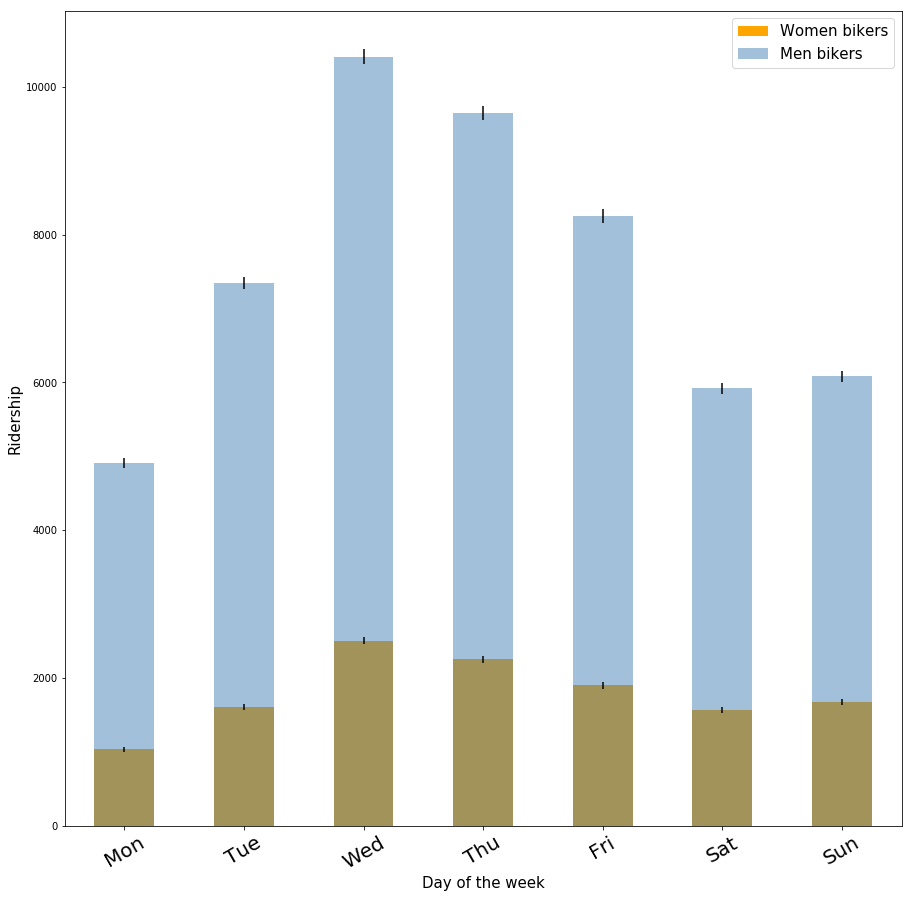

In [151]:
fig = pl.figure(figsize = (15,15))

counts_w = df['date'][df.gender ==2].groupby([df['date'].dt.weekday]).count()
data_w = 1
error_w = np.sqrt(counts_w)
ax = ((counts_w)/data_w).plot(kind="bar",color='Orange',  yerr=[
            ((error_w) / data_w, (error_w) / data_w)], label='women bikers')

counts_m = df['date'][df.gender==1].groupby([df['date'].dt.weekday]).count()
data_m = 1
error_m = np.sqrt(counts_m)
ax = ((counts_m)/data_m).plot(kind="bar",color='SteelBlue', alpha = 0.5, yerr=[
            ((error_m) / data_m, (error_m) / data_m)], label='men bikers')


xticklabels =['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tmp = ax.set_xticklabels(xticklabels,rotation = 30,fontsize = 20)

ax.set_xlabel("Day of the week",fontsize = 15)
ax.set_ylabel("Ridership",fontsize = 15)
pl.legend(['Women bikers','Men bikers'],fontsize = 15)


## Figure 1b: Distribution of Citibike bikers by gender in Feburary 2015, absolute counts with statitical errors

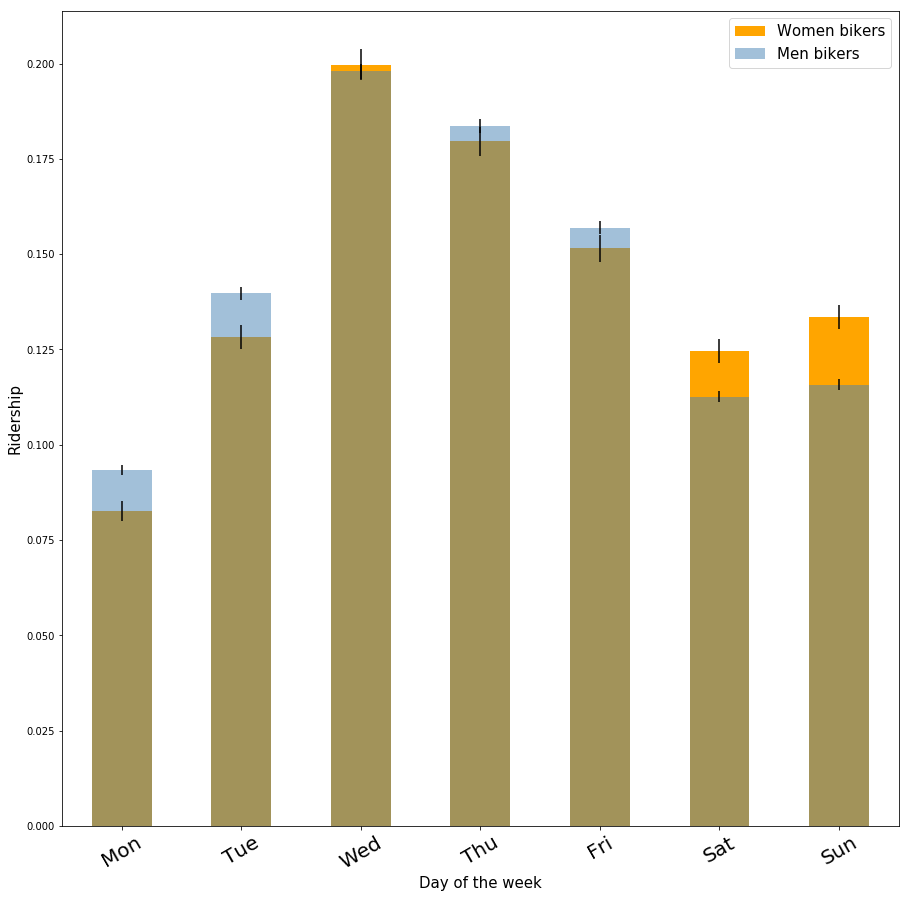

In [152]:
## Let's normalize the distribution of men and also women 


fig = pl.figure(figsize = (15,15))

#counts_w = df['date'][df.gender ==2].groupby([df['date'].dt.weekday]).count()

dataNorm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
ax = ((counts_w)/dataNorm_w).plot(kind="bar",color='Orange',  yerr=[
            ((error_w) / dataNorm_w, (error_w) / dataNorm_w)], label='women bikers')

#counts_m = df['date'][df.gender==1].groupby([df['date'].dt.weekday]).count()
dataNorm_m = counts_m.sum()
error_m = np.sqrt(counts_m)
ax = ((counts_m)/dataNorm_m).plot(kind="bar",color='SteelBlue', alpha = 0.5, yerr=[
            ((error_m) / dataNorm_m, (error_m) / dataNorm_m)], label='men bikers')


xticklabels =['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tmp = ax.set_xticklabels(xticklabels,rotation = 30,fontsize = 20)

ax.set_xlabel("Day of the week",fontsize = 15)
ax.set_ylabel("Ridership",fontsize = 15)
pl.legend(['Women bikers','Men bikers'],fontsize = 15)

In [14]:
?plot

## Figure 2a: Distribution of Citibike bikers by gender in Feburary 2015, normalized

In [ ]:
# missing Test of proportions